<a href="https://colab.research.google.com/github/ProvenDruid/ANN/blob/main/ANN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
from matplotlib_inline.backend_inline import set_matplotlib_formats
np.set_printoptions(suppress=True)

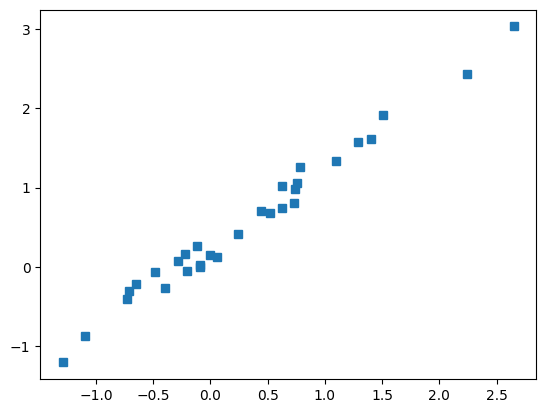

In [ ]:
N=30
x=torch.randn(N,1)
y=x+torch.rand(N,1)/2

plt.plot(x,y,'s')
plt.show()

In [ ]:
#building a model
ANNreg=nn.Sequential(
    nn.Linear(1,1),          #input layer  1 input and 1 output
    nn.ReLU(),               #activation fucntion
    nn.Linear(1,1)           #output layer the output of the first layer is the input of this layer
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
#learning rate
learningRate=0.05

#loss function
lossfun=nn.MSELoss()

#optimizer    (flavor of the gradient descent)  stochaistic gradient descent
optimizer=torch.optim.SGD(ANNreg.parameters(), lr=learningRate)


In [ ]:
#training
numEpochs=500
losses=torch.zeros(numEpochs)




#train the model!
for epochi in range(numEpochs):
  #forward pass
  yHat=ANNreg(x)  #data passes through the network and gives an output, which are the predicted values

  #compute loss
  loss=lossfun(yHat,y) #we use the predicted values and the observed values
  losses[epochi]=loss #losses are stored

  #backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



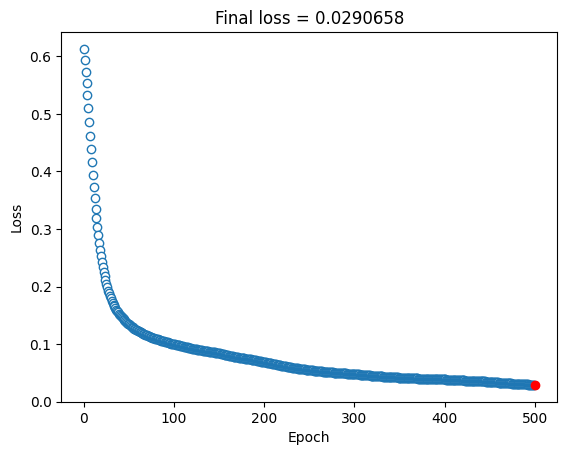

tensor([[ 0.3019],
        [ 0.1508],
        [-0.1633],
        [ 0.8770],
        [ 0.0300],
        [ 0.2374],
        [ 0.9901],
        [ 1.5472],
        [ 0.9835],
        [ 0.0159],
        [-0.6066],
        [ 0.1216],
        [ 2.9321],
        [ 0.4883],
        [ 1.7682],
        [ 0.7696],
        [-0.2528],
        [ 0.6874],
        [-0.6066],
        [ 1.6684],
        [ 1.3553],
        [ 1.0046],
        [-0.4190],
        [ 0.8757],
        [-0.4838],
        [-0.0440],
        [ 0.1439],
        [ 1.0324],
        [ 2.5160],
        [-0.5002]], grad_fn=<AddmmBackward0>)

In [ ]:
#show the losses

#manually compute losses
#final forward pass
predictions=ANNreg(x)

#final loss (MSE)
testloss=(predictions-y).pow(2).mean()

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.plot(numEpochs,testloss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()
predictions

<function matplotlib.pyplot.show(close=None, block=None)>

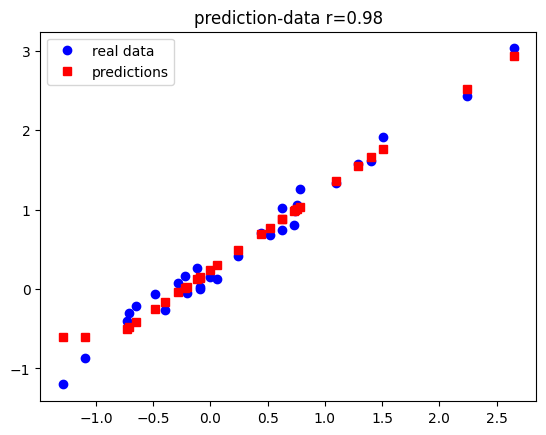

In [ ]:
#plot the data

plt.plot(x,y,'bo', label='real data')
plt.plot(x,predictions.detach(), 'rs', label='predictions')
plt.title(f"prediction-data r={np.corrcoef(y.T, predictions.detach().T)[0,1]:.2f}")
plt.legend()
plt.show



In [ ]:
print(losses)
print(losses[-1])

tensor([0.6128, 0.5930, 0.5731, 0.5531, 0.5328, 0.5107, 0.4861, 0.4623, 0.4395,
        0.4171, 0.3944, 0.3733, 0.3537, 0.3355, 0.3184, 0.3028, 0.2887, 0.2759,
        0.2640, 0.2529, 0.2428, 0.2336, 0.2253, 0.2176, 0.2107, 0.2043, 0.1984,
        0.1931, 0.1881, 0.1836, 0.1794, 0.1755, 0.1719, 0.1686, 0.1655, 0.1626,
        0.1599, 0.1574, 0.1551, 0.1529, 0.1509, 0.1490, 0.1472, 0.1454, 0.1436,
        0.1418, 0.1401, 0.1385, 0.1370, 0.1355, 0.1341, 0.1328, 0.1315, 0.1303,
        0.1291, 0.1279, 0.1268, 0.1258, 0.1248, 0.1238, 0.1229, 0.1219, 0.1211,
        0.1202, 0.1194, 0.1186, 0.1178, 0.1171, 0.1163, 0.1156, 0.1149, 0.1143,
        0.1136, 0.1130, 0.1124, 0.1118, 0.1112, 0.1106, 0.1101, 0.1095, 0.1090,
        0.1085, 0.1080, 0.1075, 0.1071, 0.1066, 0.1061, 0.1057, 0.1053, 0.1047,
        0.1042, 0.1037, 0.1033, 0.1028, 0.1023, 0.1019, 0.1015, 0.1010, 0.1006,
        0.1002, 0.0998, 0.0994, 0.0990, 0.0987, 0.0983, 0.0979, 0.0976, 0.0972,
        0.0969, 0.0966, 0.0961, 0.0957, 

In [ ]:
len(losses)

500

In [ ]:
def ByTModel(x,y):
  #build the model
  ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )
  # learning rate
  learningRate = .05

  # loss function
  lossfun = nn.MSELoss()

  # optimizer (the flavor of gradient descent to implement)
  optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

  # train the model
  numepochs = 500
  losses = torch.zeros(numepochs)

  ## Train the model!
  for epochi in range(numepochs):

    # forward pass
    yHat = ANNreg(x)

    # compute loss
    loss = lossfun(yHat,y)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ###final predictions
    predictions=ANNreg(x)

  return predictions.detach(), losses.detach()

In [ ]:
def dataCreation(m):
  N = 50
  x = torch.randn(N,1)
  y = m*x + torch.randn(N,1)/2

  return x,y

In [ ]:
#first test
x,y=dataCreation(0.8)

#run the model
yHat,losses=ByTModel(x,y)

fig,ax=plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss over epochs')

ax[1].plot(x,y,'bo',label='Real data')
ax[1].plot(x,yHat,'rs',label='Predictions')
ax[1].set_xlabel('data entries')
ax[1].set_ylabel('predicted/observed values')
ax[1].set_title(f'prediction-data r={np.corrcoef(y.T,yHat.T)[0,1]:.2f}')
plt.legend()
plt.show()

In [ ]:
#full experiment

slopes=np.linspace(-2,2,21)

numExperiments=50

#creating the output matrix
results=np.zeros((len(slopes), numExperiments,2))

for slopei in range(len(slopes)):#21 slopes

  for N in range(numExperiments): #for each slope, 50 experiments will be made
    #create dataset and run the model
    x,y=dataCreation(slopes[slopei]) #there are 50 data entries and 50 generated (observed data) points that take into account the slope for its generation
    yHat,losses= ByTModel(x,y)# for each experiment, the output includes 50 predictions and the losses array with 500 values, which essentially are the avg value of the loss (difference between prediction and observed data) for each iteration

    #store the results along the iterations
    results[slopei,N,0]=losses[-1]
    results[slopei,N,1]=np.corrcoef(y.T,yHat.T)[0,1]

#in case correlation is 0 if the model didnt do well, set nan s->0
results[np.isnan(results)]=0

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('slope')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss over slope')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',label='Real data')
ax[1].set_xlabel('slope')
ax[1].set_ylabel('real-predicted correlation')
ax[1].set_title('model performance')
plt.legend()
plt.show()